In [32]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
graphdf = pd.read_excel('conceptnetsubgraph_2.xlsx')
graphdf.head()

,Source,Relationship type,Destination
0,derivative_work,hascontext,legal
1,derivative_work,relatedto,original
2,derivative_work,relatedto,similar
3,derivative_work,relatedto,work
4,cheese_crisp,relatedto,bake


In [3]:
len(graphdf)

160670

In [4]:
print("No. of edges in subgraph : ",len(graphdf))

No. of edges in subgraph :  160670


In [5]:
print("No. of Nodes in subgraph : ",graphdf['Source'].nunique() + graphdf['Destination'].nunique())

No. of Nodes in subgraph :  28371


In [6]:
print("Average no. of neighbors in this subgraph : ",len(graphdf)/(graphdf['Source'].nunique() + graphdf['Destination'].nunique()))

Average no. of neighbors in this subgraph :  5.663177187973635


In [7]:
G = nx.from_pandas_edgelist(graphdf,'Source','Destination',edge_attr='Relationship type',create_using=nx.MultiDiGraph)

In [8]:
path_count = 1
for path in nx.all_simple_edge_paths(G,'apple','banana',cutoff=3):
    print('path ',path_count)
    path_count+=1
    for i in range(len(path)):
        print(path[i][0] +" -> " + G[path[i][0]][path[i][1]][path[i][2]]['Relationship type'] + " -> " + path[i][1])

    

path  1
apple -> antonym -> banana
path  2
apple -> distinctfrom -> banana
path  3
apple -> locatednear -> banana
path  4
apple -> antonym -> orange
orange -> relatedto -> yellow
yellow -> relatedto -> banana
path  5
apple -> distinctfrom -> orange
orange -> relatedto -> yellow
yellow -> relatedto -> banana
path  6
apple -> relatedto -> orange
orange -> relatedto -> yellow
yellow -> relatedto -> banana
path  7
apple -> hasproperty -> green
green -> distinctfrom -> yellow
yellow -> relatedto -> banana
path  8
apple -> hasproperty -> green
green -> hasproperty -> yellow
yellow -> relatedto -> banana
path  9
apple -> hasproperty -> green
green -> relatedto -> yellow
yellow -> relatedto -> banana
path  10
apple -> relatedto -> green
green -> distinctfrom -> yellow
yellow -> relatedto -> banana
path  11
apple -> relatedto -> green
green -> hasproperty -> yellow
yellow -> relatedto -> banana
path  12
apple -> relatedto -> green
green -> relatedto -> yellow
yellow -> relatedto -> banana
path 

In [9]:
# Idea for Apriori  - apple, [antonym,distinctfrom,locatednear] , banana

In [10]:
graphdf['Relationship type'].value_counts()

relatedto                    95776
hascontext                   12076
isa                          10862
synonym                       8665
atlocation                    7869
                             ...  
etymologicallyderivedfrom        1
symbolof                         1
language                         1
Causes                           1
MadeOf                           1
Name: Relationship type, Length: 64, dtype: int64

In [11]:
rel_freq = graphdf['Relationship type'].value_counts()
rel_freq[:10]

relatedto      95776
hascontext     12076
isa            10862
synonym         8665
atlocation      7869
derivedfrom     4473
usedfor         3922
mannerof        2449
antonym         2237
formof          1278
Name: Relationship type, dtype: int64

In [12]:
nx.has_path(G,'kitchen','sugar')

True

In [13]:
path_count = 1
for path in nx.all_simple_edge_paths(G,'kitchen','sugar',cutoff=3):
    print('path ',path_count)
    path_count+=1
    for i in range(len(path)):
        print(path[i],G[path[i][0]][path[i][1]][path[i][2]]['Relationship type'])

path  1
('kitchen', 'home', 0) atlocation
('home', 'person', 0) relatedto
('person', 'sugar', 0) desires
path  2
('kitchen', 'home', 0) atlocation
('home', 'sweet', 0) relatedto
('sweet', 'sugar', 0) relatedto
path  3
('kitchen', 'cook', 0) etymologicallyrelatedto
('cook', 'person', 0) relatedto
('person', 'sugar', 0) desires
path  4
('kitchen', 'cook', 1) usedfor
('cook', 'person', 0) relatedto
('person', 'sugar', 0) desires
path  5
('kitchen', 'place', 0) isa
('place', 'person', 0) distinctfrom
('person', 'sugar', 0) desires
path  6
('kitchen', 'place', 0) isa
('place', 'person', 1) relatedto
('person', 'sugar', 0) desires
path  7
('kitchen', 'room', 0) isa
('room', 'hill', 0) relatedto
('hill', 'sugar', 0) relatedto
path  8
('kitchen', 'room', 1) relatedto
('room', 'hill', 0) relatedto
('hill', 'sugar', 0) relatedto


In [14]:
G.out_degree('kitchen')

65

In [15]:
G.in_degree('kitchen')

295

In [16]:
relations = []
for i in G.edges('kitchen'):
    relations.append(G.get_edge_data(i[0],i[1])[0]['Relationship type']) 
    print(i,G.get_edge_data(i[0],i[1])[0]['Relationship type'])

('kitchen', 'apartment') atlocation
('kitchen', 'breadbox') atlocation
('kitchen', 'fraternity_house') atlocation
('kitchen', "friend's_house") atlocation
('kitchen', 'home') atlocation
('kitchen', 'hotel') atlocation
('kitchen', 'kansas') atlocation
('kitchen', "neighbor's_house") atlocation
('kitchen', 'restaurant') atlocation
('kitchen', 'resturant') atlocation
('kitchen', 'resturaunt') atlocation
('kitchen', 'store_sells_kitchens') atlocation
('kitchen', 'waste_bin') atlocation
('kitchen', 'kitchen_supper') derivedfrom
('kitchen', 'kitchenhand') derivedfrom
('kitchen', 'cook') etymologicallyrelatedto
('kitchen', 'cook') etymologicallyrelatedto
('kitchen', 'cuisine') etymologicallyrelatedto
('kitchen', 'cuisine') etymologicallyrelatedto
('kitchen', 'african_american_vernacular_english') hascontext
('kitchen', 'music') hascontext
('kitchen', 'dirty') hasproperty
('kitchen', 'food_preparation_area') isa
('kitchen', 'food_preparation_area') isa
('kitchen', 'place') isa
('kitchen', 'pla

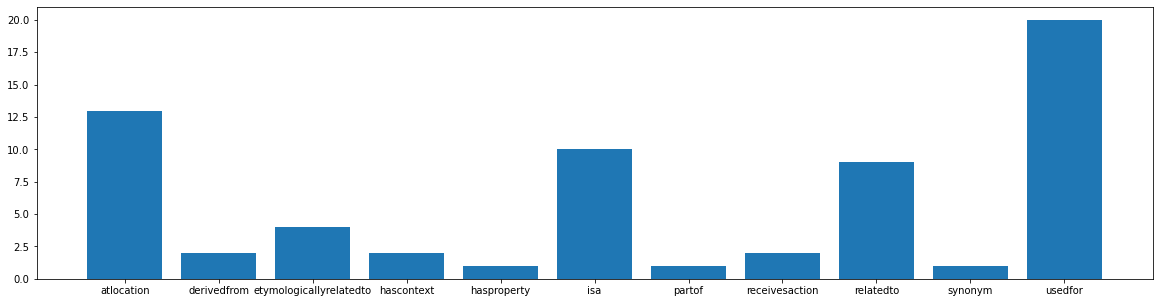

In [17]:
from collections import Counter
w = Counter(relations)
plt.figure(figsize=(20,5))
plt.bar(w.keys(),w.values())
plt.show()

In [18]:
print(G.out_degree('shirt'))
print(G.in_degree('shirt'))

45
50


In [19]:
relations = []
for i in G.edges('shirt'):
    relations.append(G.get_edge_data(i[0],i[1])[0]['Relationship type']) 
    print(i,G.get_edge_data(i[0],i[1])[0]['Relationship type'])

('shirt', 'closet') atlocation
('shirt', 'drawer') atlocation
('shirt', 'dresser') atlocation
('shirt', 'garderobe') atlocation
('shirt', 'suitcase') atlocation
('shirt', 'brownshirt') derivedfrom
('shirt', 'nightshirt') derivedfrom
('shirt', 'shirtdress') derivedfrom
('shirt', 'sweatshirt') derivedfrom
('shirt', 'skirt') etymologicallyrelatedto
('shirt', 'buttons') hasa
('shirt', 'buttons') hasa
('shirt', 'clothes') isa
('shirt', 'garment') isa
('shirt', 'item_of_clothing') isa
('shirt', 'enveloping_covering') isa
('shirt', 'top') isa
('shirt', 'dress') mannerof
('shirt', 'outfit') partof
('shirt', 'wardrobe') partof
('shirt', 'above') relatedto
('shirt', 'arm') relatedto
('shirt', 'arm_holes') relatedto
('shirt', 'blouse') relatedto
('shirt', 'clothing') relatedto
('shirt', 'holes') relatedto
('shirt', 'man') relatedto
('shirt', 'mans') relatedto
('shirt', 'waist') relatedto
('shirt', 'article') relatedto
('shirt', 'body') relatedto
('shirt', 'short') relatedto
('shirt', 'sleeve') re

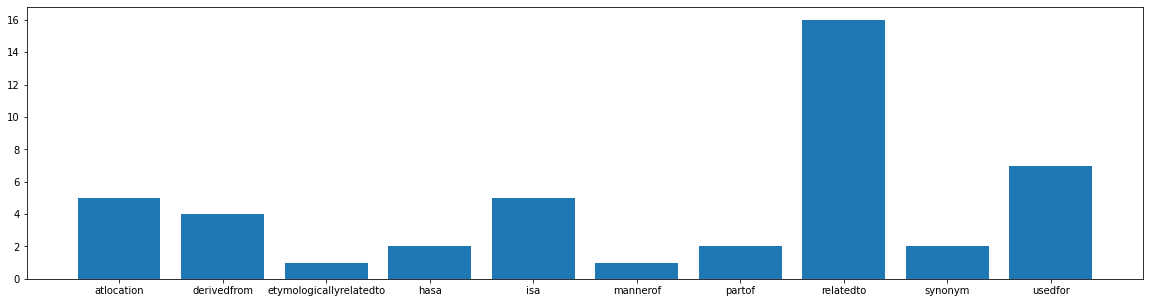

In [20]:
from collections import Counter
w = Counter(relations)
plt.figure(figsize=(20,5))
plt.bar(w.keys(),w.values())
plt.show()

In [21]:
G['sweater']

AdjacencyView({'drawer': {0: {'Relationship type': 'atlocation'}}, 'sweat': {0: {'Relationship type': 'derivedfrom'}, 1: {'Relationship type': 'relatedto'}}, 'us': {0: {'Relationship type': 'hascontext'}}, 'sticky': {0: {'Relationship type': 'hasproperty'}}, 'piece_of_clothing': {0: {'Relationship type': 'isa'}}, 'enveloping_covering': {0: {'Relationship type': 'isa'}}, 'top': {0: {'Relationship type': 'isa'}}, 'garment': {0: {'Relationship type': 'isa'}, 1: {'Relationship type': 'relatedto'}}, 'exercise': {0: {'Relationship type': 'relatedto'}}, 'jacket': {0: {'Relationship type': 'relatedto'}}, 'knit': {0: {'Relationship type': 'relatedto'}}, 'warm': {0: {'Relationship type': 'relatedto'}}, 'wool': {0: {'Relationship type': 'relatedto'}}, 'jumper': {0: {'Relationship type': 'synonym'}}, 'sweatshirt': {0: {'Relationship type': 'synonym'}}})

In [22]:
path_count = 1
for path in nx.all_simple_edge_paths(G,'shirt','sweater',cutoff=3):
    print('path ',path_count)
    path_count+=1
    for i in range(len(path)):
        print(path[i],G[path[i][0]][path[i][1]][path[i][2]]['Relationship type'])

path  1
('shirt', 'sweatshirt', 0) derivedfrom
('sweatshirt', 'pullover', 0) isa
('pullover', 'sweater', 0) isa
path  2
('shirt', 'sweatshirt', 0) derivedfrom
('sweatshirt', 'pullover', 0) isa
('pullover', 'sweater', 1) relatedto
path  3
('shirt', 'sweatshirt', 0) derivedfrom
('sweatshirt', 'fleece', 0) relatedto
('fleece', 'sweater', 0) relatedto
path  4
('shirt', 'sweatshirt', 0) derivedfrom
('sweatshirt', 'knit', 0) relatedto
('knit', 'sweater', 0) motivatedbygoal
path  5
('shirt', 'dress', 0) mannerof
('dress', 'coat', 0) relatedto
('coat', 'sweater', 0) relatedto
path  6
('shirt', 'dress', 0) mannerof
('dress', 'coat', 1) synonym
('coat', 'sweater', 0) relatedto
path  7
('shirt', 'arm', 0) relatedto
('arm', 'coat', 0) atlocation
('coat', 'sweater', 0) relatedto
path  8
('shirt', 'arm', 0) relatedto
('arm', 'sleeve', 0) relatedto
('sleeve', 'sweater', 0) relatedto
path  9
('shirt', 'arm', 0) relatedto
('arm', 'sleeve', 1) synonym
('sleeve', 'sweater', 0) relatedto
path  10
('shirt'

In [23]:
H = nx.Graph(G)

In [24]:
print("No. of Common Neighbors : ", len(list(nx.common_neighbors(H,'shirt','sweater'))))
print("Jaccard Coefficient : ", list(nx.jaccard_coefficient(H, [('shirt', 'sweater')]))[0][2])

No. of Common Neighbors :  8
Jaccard Coefficient :  0.08791208791208792


## 2 Similar Entities from Test & Train 

In [55]:
print("No. of Common Neighbors : ", len(list(nx.common_neighbors(H,'workbench','worktable'))))
print("Jaccard Coefficient : ", list(nx.jaccard_coefficient(H, [('workbench', 'worktable')]))[0][2])
print("Sorenson statistics: ", 2*len(list(nx.common_neighbors(H,'workbench','worktable')))/(H.degree('workbench')+H.degree('worktable')))
print("Salton statistics: ", 2*len(list(nx.common_neighbors(H,'workbench','worktable')))/(H.degree('workbench')*H.degree('worktable'))**(0.5))
similarity_text(embed_name="Fasttext Embedding",embed_dict=fasttext_dict,word1="workbench",word2="worktable")
similarity_text(embed_name="Glove Embedding",embed_dict=glove_dict,word1="workbench",word2="worktable")
similarity_text(embed_name="Conceptnet Numberbatch Embedding",embed_dict=conceptnet_numberbatch_dict,word1="workbench",word2="worktable")

No. of Common Neighbors :  2
Jaccard Coefficient :  0.08
Sorenson statistics:  0.13793103448275862
Salton statistics:  0.4
Cosine similarity using 'Fasttext Embedding' for pair (('workbench', 'worktable')) = 0.6928495764732361
Cosine similarity using 'Glove Embedding' for pair (('workbench', 'worktable')) = 0.5631563663482666
Cosine similarity using 'Conceptnet Numberbatch Embedding' for pair (('workbench', 'worktable')) = 0.7415089011192322


In [56]:
print("No. of Common Neighbors : ", len(list(nx.common_neighbors(H,'chicken','bbq'))))
print("Jaccard Coefficient : ", list(nx.jaccard_coefficient(H, [('chicken','bbq')]))[0][2])
print("Sorenson statistics: ", 2*len(list(nx.common_neighbors(H,'chicken','bbq')))/(H.degree('chicken')+H.degree('bbq')))
print("Salton statistics: ", 2*len(list(nx.common_neighbors(H,'chicken','bbq')))/(H.degree('chicken')*H.degree('bbq'))**(0.5))
similarity_text(embed_name="Fasttext Embedding",embed_dict=fasttext_dict,word1="chicken",word2="bbq")
similarity_text(embed_name="Glove Embedding",embed_dict=glove_dict,word1="chicken",word2="bbq")
similarity_text(embed_name="Conceptnet Numberbatch Embedding",embed_dict=conceptnet_numberbatch_dict,word1="chicken",word2="bbq")

No. of Common Neighbors :  2
Jaccard Coefficient :  0.010582010582010581
Sorenson statistics:  0.02072538860103627
Salton statistics:  0.053205792297841475
Cosine similarity using 'Fasttext Embedding' for pair (('chicken', 'bbq')) = 0.40904659032821655
Cosine similarity using 'Glove Embedding' for pair (('chicken', 'bbq')) = 0.5946546792984009
Cosine similarity using 'Conceptnet Numberbatch Embedding' for pair (('chicken', 'bbq')) = 0.41009247303009033


## 2 Dissimilar Entities from Test & Train

In [58]:
print("No. of Common Neighbors : ", len(list(nx.common_neighbors(H,'clothesline','eggs'))))
print("Jaccard Coefficient : ", list(nx.jaccard_coefficient(H, [('clothesline', 'eggs')]))[0][2])
print("Sorenson statistics: ", 2*len(list(nx.common_neighbors(H,'clothesline', 'eggs')))/(H.degree('clothesline')+H.degree('eggs')))
print("Salton statistics: ", 2*len(list(nx.common_neighbors(H,'clothesline', 'eggs')))/(H.degree('clothesline')*H.degree('eggs'))**(0.5))
similarity_text(embed_name="Fasttext Embedding",embed_dict=fasttext_dict,word1="clothesline",word2="eggs")
similarity_text(embed_name="Glove Embedding",embed_dict=glove_dict,word1="clothesline",word2="eggs")
similarity_text(embed_name="Conceptnet Numberbatch Embedding",embed_dict=conceptnet_numberbatch_dict,word1="clothesline",word2="eggs")

No. of Common Neighbors :  0
Jaccard Coefficient :  0.0
Sorenson statistics:  0.0
Salton statistics:  0.0
Cosine similarity using 'Fasttext Embedding' for pair (('clothesline', 'eggs')) = 0.2023681253194809
Cosine similarity using 'Glove Embedding' for pair (('clothesline', 'eggs')) = 0.09051525592803955
Cosine similarity using 'Conceptnet Numberbatch Embedding' for pair (('clothesline', 'eggs')) = 0.023716134950518608


In [57]:
print("No. of Common Neighbors : ", len(list(nx.common_neighbors(H,'carpet','eggs'))))
print("Jaccard Coefficient : ", list(nx.jaccard_coefficient(H, [('carpet', 'eggs')]))[0][2])
print("Sorenson statistics: ", 2*len(list(nx.common_neighbors(H,'carpet', 'eggs')))/(H.degree('carpet')+H.degree('eggs')))
print("Salton statistics: ", 2*len(list(nx.common_neighbors(H,'carpet', 'eggs')))/(H.degree('carpet')*H.degree('eggs'))**(0.5))
similarity_text(embed_name="Fasttext Embedding",embed_dict=fasttext_dict,word1="carpet",word2="eggs")
similarity_text(embed_name="Glove Embedding",embed_dict=glove_dict,word1="carpet",word2="eggs")
similarity_text(embed_name="Conceptnet Numberbatch Embedding",embed_dict=conceptnet_numberbatch_dict,word1="carpet",word2="eggs")

No. of Common Neighbors :  1
Jaccard Coefficient :  0.004405286343612335
Sorenson statistics:  0.008733624454148471
Salton statistics:  0.024562537539453734
Cosine similarity using 'Fasttext Embedding' for pair (('carpet', 'eggs')) = 0.16559456288814545
Cosine similarity using 'Glove Embedding' for pair (('carpet', 'eggs')) = 0.14656537771224976
Cosine similarity using 'Conceptnet Numberbatch Embedding' for pair (('carpet', 'eggs')) = 0.02019725926220417


# Neural Embeddings

In [42]:
FASTTEXT_PATH = 'fasttext_embeddings/crawl-300d-2M.vec'
GLOVE_PATH = 'glove_embeddings/glove.840B.300d.txt'
NUMBERBATCH_PATH = 'numberbatch_embeddings/numberbatch-en.txt'

In [37]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')

def load_embeddings(path):
    with open(path,encoding = "utf-8") as f:
        return dict(get_coefs(*line.strip().split(' ')) for line in f)

def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            pass
    return embedding_matrix

In [45]:
bold_start = '\033[1m'
bold_end = '\033[0m'
    
def cosine_similarity(a, b):
    numerator = np.dot(a, b)
    
    a_norm = np.sqrt(np.sum(a**2))
    b_norm = np.sqrt(np.sum(b**2))
    
    denominator = a_norm * b_norm
    
    cosine_similarity = numerator / denominator
    
    return cosine_similarity

def similarity_text(embed_name,embed_dict,word1,word2):

    if embed_name in ['bert','roberta','distilbert']:
        w1 = embed_dict.encode(word1,show_progress_bar=False)
        w2 = embed_dict.encode(word2,show_progress_bar=False)
    else:
        w1 = embed_dict[word1]
        w2 = embed_dict[word2]

    print(f"Cosine similarity using {bold_start}'{embed_name}'{bold_end} for pair ({word1,word2}) = {cosine_similarity(w1,w2)}")
    return 

In [39]:
fasttext_dict = load_embeddings(FASTTEXT_PATH)

In [40]:
glove_dict = load_embeddings(GLOVE_PATH)

In [43]:
conceptnet_numberbatch_dict = load_embeddings(NUMBERBATCH_PATH)

In [46]:
similarity_text(embed_name="Fasttext Embedding",embed_dict=fasttext_dict,word1="workbench",word2="worktable")

Cosine similarity using 'Fasttext Embedding' for pair (('workbench', 'worktable')) = 0.6928495764732361


In [53]:
similarity_text(embed_name="Glove Embedding",embed_dict=glove_dict,word1="workbench",word2="worktable")

Cosine similarity using 'Glove Embedding' for pair (('workbench', 'worktable')) = 0.5631563663482666


In [54]:
similarity_text(embed_name="Conceptnet Numberbatch Embedding",embed_dict=conceptnet_numberbatch_dict,word1="workbench",word2="worktable")

Cosine similarity using 'Conceptnet Numberbatch Embedding' for pair (('workbench', 'worktable')) = 0.7415089011192322
